In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

In [2]:
df = pd.read_csv('resultsFri Apr 02 2021 21:59:42 GMT+0200 (Central European Summer Time).csv', sep=r'\s*,\s*')# Remove spaces from headers
print(df.head())
print(df.shape)
# data = df.to_numpy()


   field_size_x  field_size_y  cell_volume  cell_density  barrier_density  \
0           300           300          200             1                0   
1           300           300          200             1                2   
2           300           300          200             1                3   
3           300           300          200             1                4   
4           300           300          200             1                5   

   simulation_nr  number_of_cells  mean_speed  mean_xdir  mean_ydir  \
0              0                3    0.257686   0.001144   0.033583   
1              0                3    0.268629  -0.069752  -0.033211   
2              0                0         NaN        NaN        NaN   
3              0                3    0.272393   0.058482   0.056090   
4              0                0         NaN        NaN        NaN   

   avg_group_velocity  
0            0.146849  
1            0.163143  
2                 NaN  
3            0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


## Average direction of movement

In [48]:
def read_column_from_df(df, column_name,nan=False):
    """
    get column from the dataframe, excluding simulations without cells
    """
    col = df[column_name].to_numpy()
    if not nan:
        col = col[df['number_of_cells']>0]
    return col

cell_density = read_column_from_df(df, 'cell_density')
barrier_density = read_column_from_df(df, 'barrier_density')
mean_xdir = read_column_from_df(df, 'mean_xdir')
mean_ydir = read_column_from_df(df, 'mean_ydir')
#print(cell_density.shape, barrier_density.shape, mean_xdir.shape, mean_ydir.shape)

No handles with labels found to put in legend.


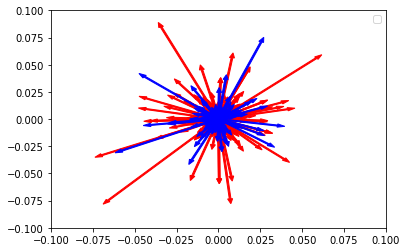

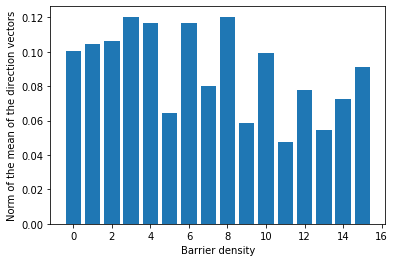

In [4]:
## analysis 1: effect of number of barriers 
mean_norms = np.zeros(len(np.unique(barrier_density)))

fig = plt.figure()
for i, barrier_dens in enumerate(np.unique(barrier_density)):
    idx = (barrier_density == barrier_dens) #np.logical_and(cell_density==fixed_cell_density, barrier_density == barrier_dens)
    x_dirs, y_dirs = mean_xdir[idx], mean_ydir[idx]
    color= 'red' if i<10 else 'blue'
    for j, (x_dir, y_dir) in enumerate(zip(x_dirs,y_dirs)):
        if i==0:
            plt.arrow(0,0, x_dir, y_dir,color=color, label='Barrier density < 10')    
        if i==10:
            plt.arrow(0,0, x_dir, y_dir,color=color, label='Barrier density >= 10')    
        else:
            plt.arrow(0,0, x_dir, y_dir,color=color)    

    # compute norm of the mean direction vectors
    directions = np.array([x_dirs, y_dirs]).T  
    mean_norms[i] = np.linalg.norm(directions)



plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.legend()
plt.show()
    
    
plt.bar(np.unique(barrier_density), mean_norms)
plt.ylabel('Norm of the mean of the direction vectors')
plt.xlabel('Barrier density')
plt.show()

No handles with labels found to put in legend.


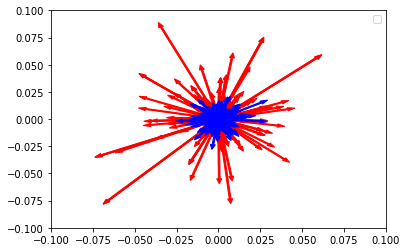

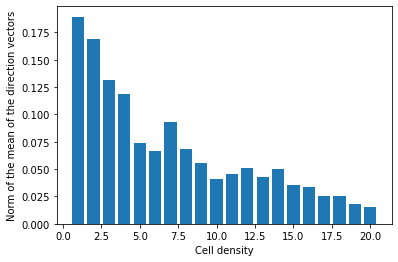

In [5]:
## analysis 2: effect of number of cells
mean_norms = np.zeros(len(np.unique(cell_density)))

fig, ax = plt.subplots(1,1)
for i, cell_dens in enumerate(np.unique(cell_density)):
    idx = (cell_density == cell_dens) #np.logical_and(cell_density==fixed_cell_density, barrier_density == barrier_dens)
    x_dirs, y_dirs = mean_xdir[idx], mean_ydir[idx]
    color= 'red' if i<10 else 'blue'
    for j, (x_dir, y_dir) in enumerate(zip(x_dirs,y_dirs)):
        if i==0:
            ax.arrow(0,0, x_dir, y_dir,color=color, label='Cell density < 10')    
        if i==10:
            ax.arrow(0,0, x_dir, y_dir,color=color, label='Cell density >= 10')    
        else:
            ax.arrow(0,0, x_dir, y_dir,color=color, label='test')    

    # compute norm of the mean direction vectors
    directions = np.array([x_dirs, y_dirs]).T  
    mean_norms[i] = np.linalg.norm(directions)

plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.legend()
plt.show()
    
# Bar plot of cell density vs. mean of norm of direction
plt.bar(np.unique(cell_density), mean_norms)
plt.ylabel('Norm of the mean of the direction vectors')
plt.xlabel('Cell density')
plt.show()

<IPython.core.display.Javascript object>


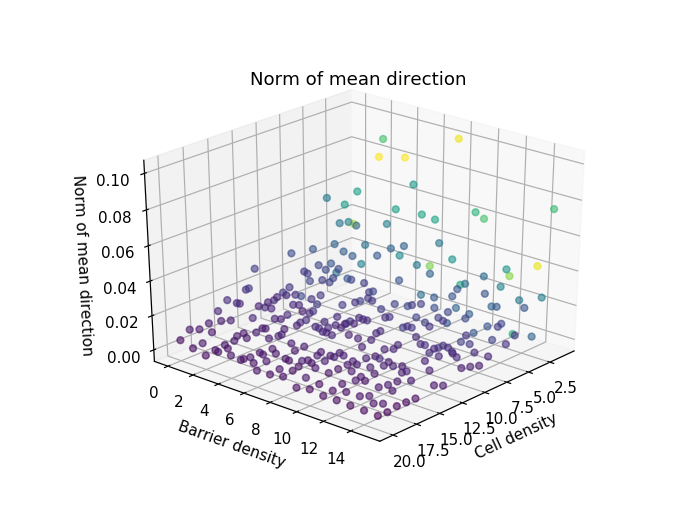

(289,)


In [38]:
## 2d surface plot
from mpl_toolkits import mplot3d
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
norms = np.zeros((len(mean_xdir)))
for i, _ in enumerate(directions):
    direct = np.array([mean_xdir[i], mean_ydir[i]]).T
    norms[i] = np.linalg.norm(direct)

print(norms.shape)
ax.scatter(cell_density, barrier_density, norms, c=avg_group_velocity,cmap='viridis', alpha=0.6)

#ax.view_init(0.00929527, (-3.39275,-2.1145))
ax.set_xlabel('Cell density')
ax.set_ylabel('Barrier density')
ax.set_zlabel('Norm of mean direction')
ax.set_title('Norm of mean direction')
plt.show()

<IPython.core.display.Javascript object>


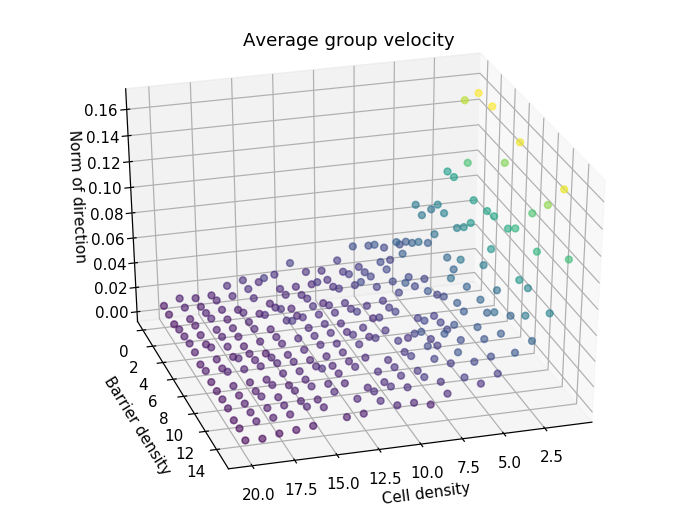

In [22]:
## mean velocity -> group velocity:
## 2d surface plot
avg_group_velocity = read_column_from_df(df, 'avg_group_velocity')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(cell_density, barrier_density, avg_group_velocity, c=avg_group_velocity,cmap='viridis', alpha=0.6)

ax.set_xlabel('Cell density')
ax.set_ylabel('Barrier density')
ax.set_zlabel('Norm of direction')
ax.set_title('Average group velocity')
fig.tight_layout()
plt.show()
# for 

In [39]:
# 

<IPython.core.display.Javascript object>


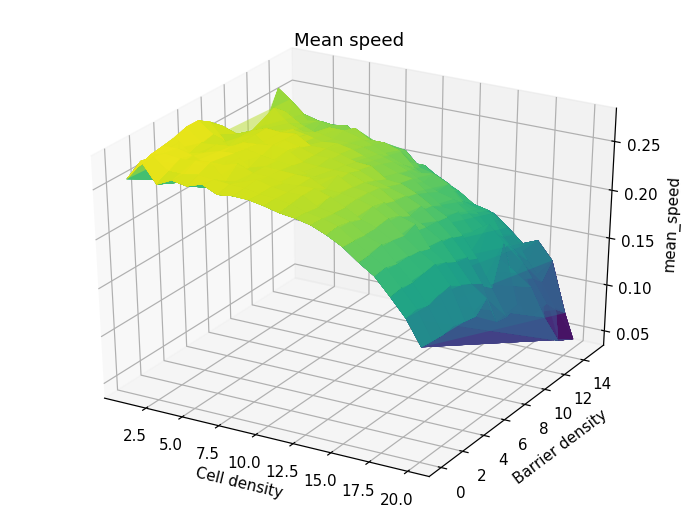

In [61]:
## Speed
## mean velocity -> group velocity:
## 2d surface plot
cell_density = read_column_from_df(df, 'cell_density',nan=False)
barrier_density = read_column_from_df(df, 'barrier_density',nan=False)
mean_speed = read_column_from_df(df, 'mean_speed',nan=False)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#ax.scatter(cell_density, barrier_density, mean_speed, c=mean_speed, cmap='viridis', alpha=0.6)

# start attempt surface plot
x = cell_density
y = barrier_density
X, Y = np.meshgrid(cell_density, barrier_density)
Z = griddata((x, y), mean_speed, (X, Y), method='cubic')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', alpha=0.5)
# end attempt surface plot

ax.set_xlabel('Cell density')
ax.set_ylabel('Barrier density')
ax.set_zlabel('mean_speed')
ax.set_title('Mean speed')
fig.tight_layout()
plt.show()
# for 